###### K-Means algorithm is a special case of Expectation Maximisation Algorithm

#### Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # generates isotropic gaussian blobs for clustering

#### Dataset Preparation

In [92]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)
print(X.shape) 
# X contains 500 samples with 2 features each.
print(y.shape)
 # y values tells samples in X belong to which cluster.

(500, 2)
(500,)


#### Dataset Visualization

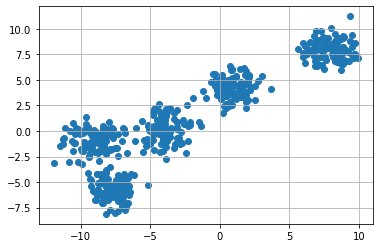

In [93]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

We can notice we have five clusters as we passed a parameter in make_blobs set centers=5. We need to identify these cluster centers on our own using a suitable algorithm.

##### Step 1: Assigning random centers to the center

In [105]:
k=5  # number of clusters

color = ["red","green","yellow","blue","orange"] # colour that can be given to clusters

clusters = {} # A dictionary made to store cluster info
    
for i in range(k):
    # To initialize with a random centers within a range (-10,10) 
    center = 10.0*(2*np.random.random((X.shape[1],))-1)
    
    points = []
    
    ''' A cluster dictionary holds the center assigned to the cluster, the label(colour) assigned to the cluster, and a list
     containing the points/samples associated with the cluster. '''
    
    cluster = {
        'center': center,
        'points':  points,
        'colour':color[i]
        }
    
    clusters[i]=cluster
print(clusters)

{0: {'center': array([-9.83778644,  2.60541764]), 'points': [], 'colour': 'red'}, 1: {'center': array([-2.19416302, -8.05983705]), 'points': [], 'colour': 'green'}, 2: {'center': array([ 6.03958282, -4.99708886]), 'points': [], 'colour': 'yellow'}, 3: {'center': array([9.62618942, 1.67737582]), 'points': [], 'colour': 'blue'}, 4: {'center': array([8.26272228, 9.58094745]), 'points': [], 'colour': 'orange'}}


In [106]:
def Euc_dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

#### Step 2: The E-step (Assigning each sample to its nearest center / to one of the clusters)

In [107]:
def assignPointToClusters(clusters):
    # Loop runs for all the data sample points, here 500
    for i in range(X.shape[0]):
        distance = []
        curr_sample = X[i]
        # calculating the distance of the current sample from all the cluster one by one and storing it inside a distance list
        for j in range(k):
            d = Euc_dist(curr_sample,clusters[j]['center'])
            distance.append(d)
        # returns the cluster to which current sample has least distance  
        curr_sample_cluster = np.argmin(distance)
        # adding the current sample/point to the cluster
        clusters[curr_sample_cluster]['points'].append(curr_sample)

def updateClusters(clusters): # M-step
    for i in range(k):
        pts = np.array(clusters[i]['points'])

        if pts.shape[0]>0: #If a cluster has non-zero points 
            new_u = pts.mean(axis=0)
            clusters[i]['center'] = new_u
            clusters[i]['points'] = [] # Clear the list
            
def plotClusters(clusters):
    
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        # Plotting the points
        # There can be a possibility that there are no points associated with a cluster as the distance in each case was not minimun
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['colour'])
        except:
            pass
        
        # Plot the cluster centers
        uk = clusters[i]['center']
        plt.scatter(uk[0],uk[1],color = 'black', marker='*') 

###### Initial plot after randomly assigning the centers

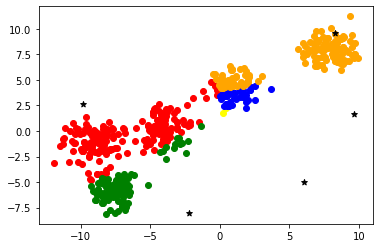

In [108]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 1

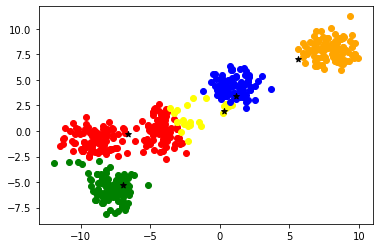

In [109]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 2

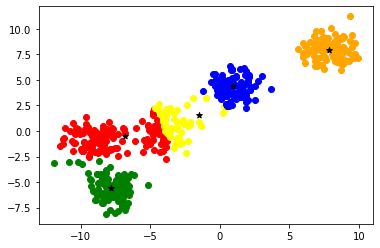

In [110]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 3

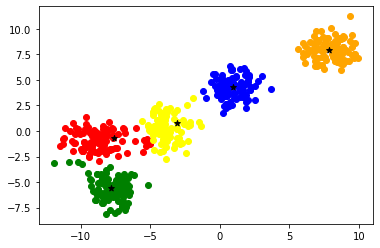

In [111]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 4

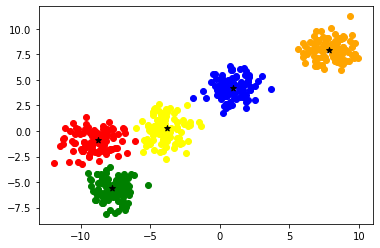

In [112]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

###### After updation 5

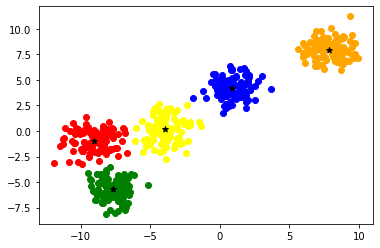

In [113]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

We can notice in last two updations, no significant changes have been onserved in the plots. So, we can conclude that our centers have converged.